In [105]:
library(actuar)
library(ggplot2)

Giacomo Longaroni #2126898

# Ex 1: Discrete random variable

### the probability distribution function of a discrete variable k is given by the zero-truncated Poisson distribution: $P(k) = \frac{\lambda^k e^{-\lambda}}{k! (1 - e^{-\lambda})}$

1.1) Write the R functions for the probability density and cumulative distribution functions, using the R naming convention. Assuming $\lambda$ = 1.4

In [138]:
# defining lambda and k 
lambda <- 1.4
k <- (1:7)
# defining probability density function
pdf_ztrpois <- dztpois(k, lambda, log = FALSE)
# defining cumulative density function
cdf_ztrpois <- pztpois(k, lambda, log = FALSE)

# building a dataframe 
df <- data.frame(k,pdf_ztrpois,cdf_ztrpois)


1.2) Produce two plots showing the pdf and cdf, separately

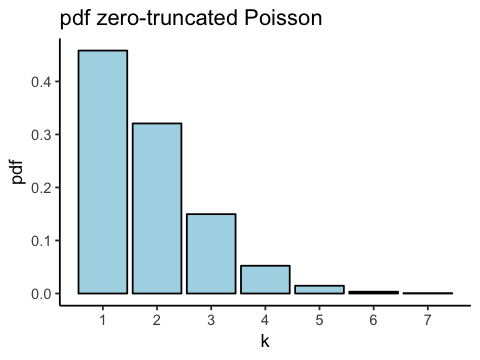

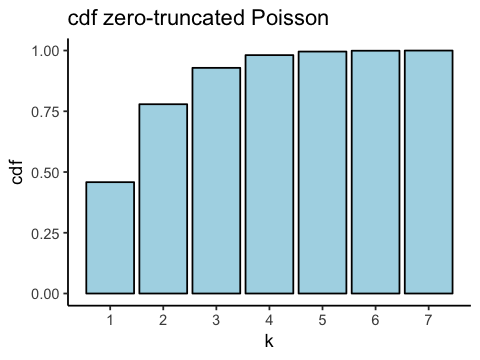

In [150]:
# probability distribution plot
options(repr.plot.width = 4, repr.plot.height = 3)
pdf_plot <- ggplot(data = df,  aes(x = k, y = pdf_ztrpois))+
     labs(x='k', y='pdf', title = 'pdf zero-truncated Poisson')+
     geom_bar(stat="identity", color = 'black', fill = 'light blue')+
     scale_x_continuous(breaks = 1:10) +
     theme_classic()
pdf_plot

# cumulative distribution plot
options(repr.plot.width = 4, repr.plot.height = 3)
cdf_plot <- ggplot(data = df,  aes(x = k, y = cdf_ztrpois))+
     labs(x='k', y='cdf', title = 'cdf zero-truncated Poisson')+
     geom_bar(stat="identity", color = 'black', fill = 'light blue')+
     scale_x_continuous(breaks = 1:10) +
     theme_classic()
cdf_plot

1.3) Compute the mean value and variance of the probability distribution using R

In [151]:
# theoretical quantities
mean_pdf = sum(df$k * df$pdf_ztrpois)
std_pdf = sum(df$pdf_ztrpois * (df$k - mean_pdf)^2)

cat('Expected values of pdf: ', round(mean_pdf,2), '\n')
cat('Variance of pdf: ', round(std_pdf,2), '\n')


Expected values of pdf:  1.86 
Variance of pdf:  1 


1.4) Generate a sample of random numbers from this distribution and show them in an histogram. Evaluate the sample mean.


Sample Mean: 1.85 
Sample Variance: 1

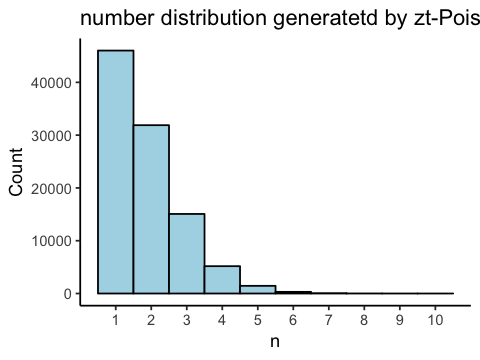

In [153]:
set.seed(189)
# empirical sample
N <- 100000
zt_points <- data.frame(n = rztpois(N, lambda))

# plot setting
# min and max for bins
min_n <- min(zt_points$n)
max_n <- max(zt_points$n)

# generating bins
binwidth <- 1
bins <- seq(min_n - binwidth/2, max_n + binwidth/2, by = binwidth)

p <- ggplot(zt_points, aes(x=n)) + 
  geom_histogram(breaks = bins, fill = 'light blue', color = 'black', closed = "left") +
  scale_x_continuous(breaks = min_n:max_n, labels = min_n:max_n) + # Assicura che i ticks siano centrati
  labs(x = 'n', y = 'Count', title = 'number distribution generatetd by zt-Poisson') +
  theme_classic()
p

# printing empirical results
cat('Sample Mean:', round(mean(zt_points$n),2), '\n')
cat('Sample Variance:', round((sd(zt_points$n))^2,2))


# Ex 2 Continuous random variable

The energy distribution of CR muons at sea level can be approximated as follows 

$p(E) = N
\begin{cases} 
1 & \text{for } E < E_0 \\
\left( \frac{1}{(E - E_0 + 1)} \right)^{-\gamma} & \text{for } E \geq E_0 
\end{cases}$ 

consider: $E_0 = 7.25$ Gev, $\gamma = 2.7$

2.1) Compute the normalisation factor N using R.

In [154]:
# defining the probability density function vectoralized
pdf_ex <- function(E, E0 = 7.25, gamma = 2.7) {
  ifelse(E < E0, 1, ((E - E0 + 1))^-gamma)
}
# lets integrate to find the normalization function
pdf_integral <- integrate(pdf_ex, lower = 0, upper = 9999)
N = 1/pdf_integral$value

# print it out
cat('Normalization factor:',round(N,3))

# redefining the normalized pdf
pdf_ex_normalized <- function(E, E0 = 7.25, gamma = 2.7, norm = N) {
  ifelse(E < E0, 1 * norm , norm * ((E - E0 + 1))^-gamma)
}



Normalization factor: 0.128

2.2) Plot the probability density function in R.

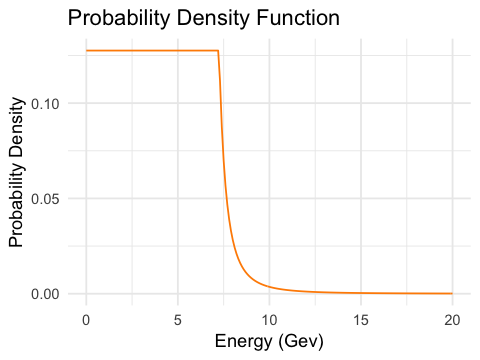

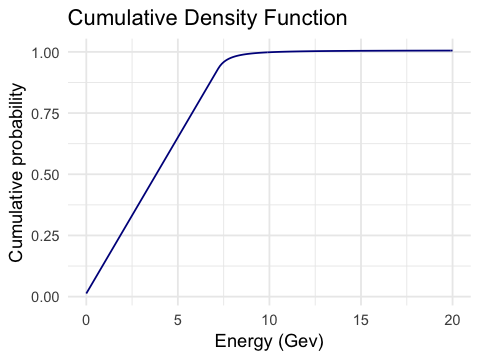

In [156]:
# x axis
dE = 0.1
E_values <- seq(0, 20, by = dE)  

# y axis
pdf_values <- pdf_ex_normalized(E = E_values)
cdf_values <- cumsum(pdf_values) * dE

# building dataframe
pdf_data <- data.frame(E = E_values, Density = pdf_values, Cumulative = cdf_values)

# plotting pdf
p <- ggplot(pdf_data, aes(x = E, y = Density)) +
  geom_line(color = 'dark orange') + 
  labs(x = "Energy (Gev)", y = "Probability Density", title = "Probability Density Function") +
  theme_minimal()
p

# plotting cdf
p <- ggplot(pdf_data, aes(x = E, y = Cumulative)) +
  geom_line(color = 'dark blue') + 
  labs(x = "Energy (Gev)", y = "Cumulative probability", title = "Cumulative Density Function") +
  theme_minimal()
p

2.3) Compute the mean value using R

In [157]:
# computing expected values by integration
pdf_data$p.E <- pdf_data$E * pdf_data$Density
cat('Expected value of E =', round(sum(pdf_data$p.E * dE),2), 'Gev')

Expected value of E = 3.97 Gev

# Exercise 3

Suppose that the average number of accidents at an intersection is two per day.

3.1) Using Markov’s inequality, find a bound for the probability that at least five accidents will occur
tomorrow.

In [160]:
# Markov inequality 
avarage_accident <- 2
prob <-  2/5
cat('The probability of having at least five accidents tomorrow P(X >= 5 | lambda) <=', prob)

The probability of having at least five accidents tomorrow P(X >= 5 | lambda) <= 0.4

3.2) Using Poisson random variables, calculate the probability that at least five accidents will occur tomorrow. Compare this value with the bound obtained in the previous point 

 The probability of having at least five accidents tomorrow P(>=5|lambda) =  0.053 


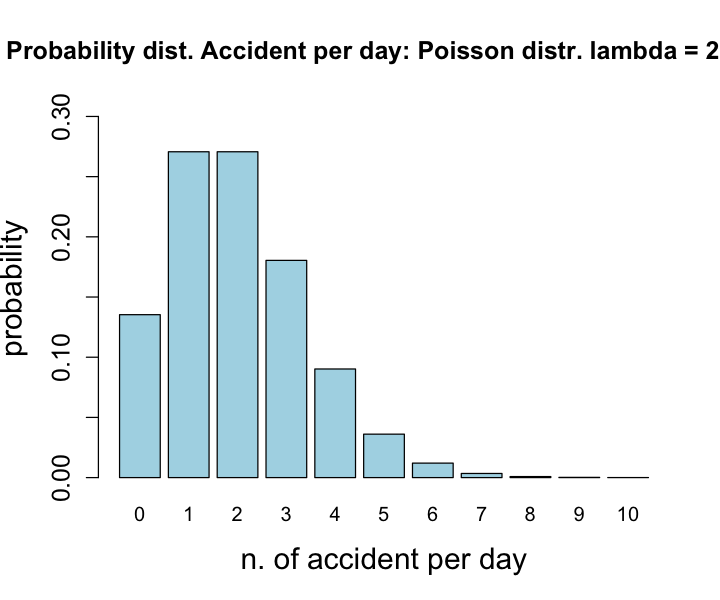

In [162]:
# we consider this process described by a poisson distribution:
# lambda parameter -> expectation value: 2 accidents per day 
lambda <- 2

# the requersted probability is: P( >=5 | lambda )
accidents <- 0:10
options(repr.plot.width = 6, repr.plot.height = 5)
pois_dist <- dpois(accidents,lambda)
barplot(pois_dist, 
        names=accidents, 
        col='light blue',
        xlab='n. of accident per day', ylab='probability', 
        main = sprintf("Probability dist. Accident per day: Poisson distr. lambda = %.2f ",lambda), 
        ylim=c(0,0.315),
        cex.lab=1.5, cex.axis=1.25, cex.main=1.25, cex.sub=1.5)
        
cat(paste(c(" The probability of having at least five accidents tomorrow P(>=5|lambda) = ", round(sum(pois_dist[6:11]),3),'\n')))



In [165]:
# the results doesn't contraddict each other, Markov's inequality just give us an upper bound of probability:
# in this case 0.05 < 0.4 so it is coerent

3.3) Let the variance of the number of accidents be two per day. Using Chebyshev’s inequality, find a bound on the probability that tomorrow at least five accidents will occur.

In [166]:
# we want now calculate the upperbound probability for P( X>= 5 | lambda ) with Chebyshev’s inequality
# the Chebyshev’s inequality tell us that P( abs(X-mu) >= k) <= var/k^2

# lets add the new information (variance)
variance <- 2

# absolute value of X-mu
k <- abs( 5 - lambda )

# Chebyshev’s inequality
prob <- variance/(k^2)

# print out the result
cat('The probability of having at least five accidents tomorrow P(>=5|lambda) <= ', round(prob,2))

The probability of having at least five accidents tomorrow P(>=5|lambda) <=  0.22

# Exercise 4

The waiting period from the time a book is ordered until it is received is a random variable with mean seven days and standard deviation two days. If Helen wants to be 95% sure that she receives a book by certain date, how early should she order the book?


In [168]:
# let's build the quantile for a normal distribution with mean = 7 and std = 2 
delivery_mean <- 7
delivery_std <- 2

# Credibility interval 
lower_credibility_bound <- qnorm(0.025, delivery_mean, delivery_std)
upper_credibility_bound <- qnorm(0.975, delivery_mean, delivery_std)

cat("The 95% credibility interval is ", round(lower_credibility_bound,1), "-", round(upper_credibility_bound,1), " days", '\n')
cat(" Helen has to order the book 11 days before ")


The 95% credibility interval is  3.1 - 10.9  days 
 Helen has to order the book 11 days before 

# Exercise 5


An ordinary deck of 52 cards is divided randomly into 26 pairs. Using Chebyshev’s inequality, find an upper bound for the probability that, at most, 10 pairs consist of a black and a red card.

In [171]:
# let's define the variable X = 1 if a pair of cards is different in colours, 0 otherwise 
# for Chebyshev’s inequality we need to find the expected values and the variance 

# P( X = 1 ): probability of having different color pair
P_X = 2 * ( 26/52 * 26/51 )

# For each drow of pair we have a bernoully process so we can define the model parameters E(X) = np, var(X) = np(1-p)
E_X = 26 * P_X
var_X = E_X * (1-P_X)

# having now the parameter we can compute the Chebyshev’s inequality considering P(abs(X - E_X) >= k) with X = 10
k <- abs( 10 - E_X )
upper_prob <- var_X/(k^2)

# Print the results
cat("Expected number of mixed pairs E(X):", round(E_X,0), "\n")
cat("Variance of X:", round(var_X,0), "\n")
cat("Upper bound probability: Probability of drowing at least 10 pairs of different colours P(X >= 10 | sigma, mu ) <=", round(upper_prob,2), "\n")


Expected number of mixed pairs E(X): 13 
Variance of X: 6 
Upper bound probability: Probability of drowing at least 10 pairs of different colours P(X >= 10 | sigma, mu ) <= 0.61 


# Exercise 6

In a stationary bus at the departure station, a passenger gets on the bus, on average every 30 seconds.


6.1) Compute the probability of getting more than 6 passenger after 2 minutes. Evaluate the probability of having less than 4 passenger after 3 minutes.

P(>=5|lambda) =  0.21 


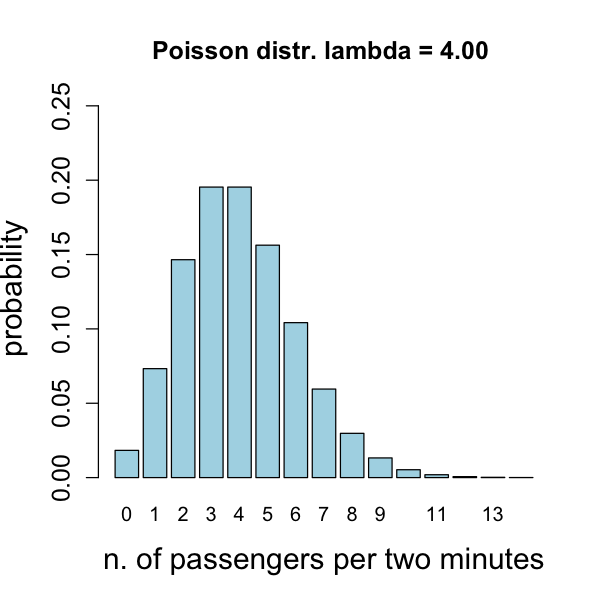

In [173]:
# even in this case we can consider a poisson process with lambda = 1 and dt = 30s 
# so for dt = 120s lambda = 4

lambda <- 4 

# the requested probability is: P( >=6 | lambda )
passengers <- 0:14
options(repr.plot.width = 5, repr.plot.height = 5)

# density function for poisson process
pois_dist <- dpois(passengers,lambda)

# plot
barplot(pois_dist, 
        names=passengers, 
        col='lightblue', 
        xlab='n. of passengers per two minutes', ylab='probability', 
        cex.lab=1.5, cex.axis=1.25, cex.main=1.25, cex.sub=1.5,
        main = sprintf("Poisson distr. lambda = %.2f ",lambda), ylim=c(0,0.255))

# extracting the values for 6 passenger
cat(paste(c("P(>=5|lambda) = ", round(sum(pois_dist[7:15]),2),'\n')))




6.2) Simulate the distribution of the arrival time of the third passenger and superimpose the correspond- ing pdf.

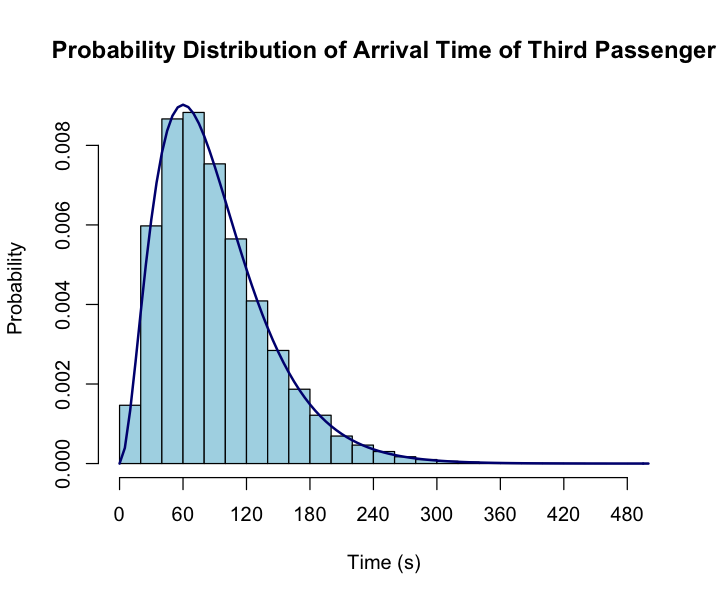

In [174]:
# now we have to consider the gamma distribution for the process 
# looking for n events in a given time 

n_passenger <- 3
# rate parameter for exponential distribution (1 event every 30 seconds)
lambda_s <- 1/30  
# computing the distribution sampling 'time moments' from the gamma distribution
n_drow <- 100000  

# Simulate the arrival time of the third passenger
# as a gamma distribution
third_passenger_arrival_times <- rgamma(n_drow, shape = n_passenger, rate = lambda_s)

# Plot the histogram distribution of the arrival times
options(repr.plot.width = 6, repr.plot.height = 5)
hist(third_passenger_arrival_times, probability = TRUE, main = "Probability Distribution of Arrival Time of Third Passenger", xlab = "Time (s)", ylab = 'Probability', breaks = 30, col = "light blue",  xaxt = "n")
axis(1, at = seq(0, max(third_passenger_arrival_times), by = 60), las = 1) 

# superimposing the real gamma distribution
curve(dgamma(x, shape = 3, rate = lambda_s), add = TRUE, col = "navy", lwd = 2)


6.3) Repeat the procedure of the previous point for the difference in arrival time between the fifth and the first passenger.

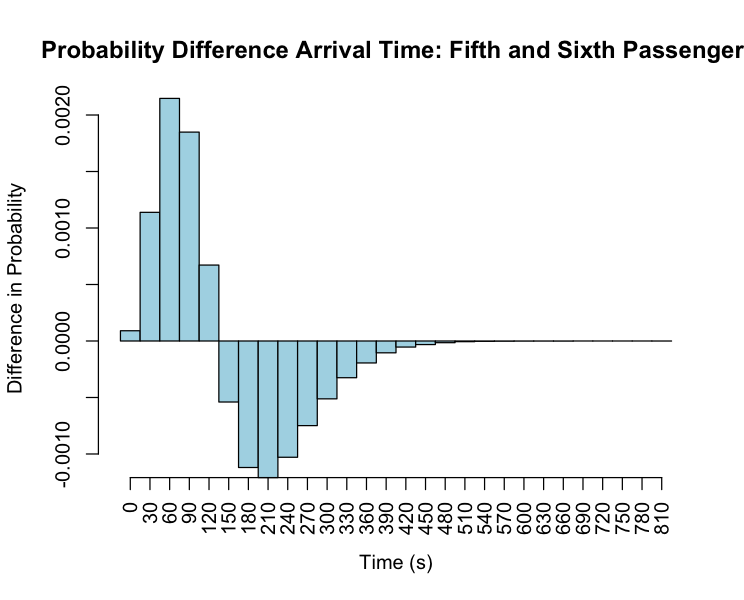

In [175]:
lambda_s <- 1/30  
n_drow <- 100000  

# computing the same for fifth passenger 
n_passenger <- 5
fifth_passenger_arrival_times <- rgamma(n_drow, shape = n_passenger, rate = lambda_s)

# and sixth passenger
n_passenger <- 6
sixth_passenger_arrival_times <- rgamma(n_drow, shape = n_passenger, rate = lambda_s)

# Defining bin edges with a fixed width of 30 seconds
bin_width <- 30
max_time <- max(c(fifth_passenger_arrival_times, sixth_passenger_arrival_times))
bin_edges <- seq(0, ceiling(max_time / bin_width) * bin_width, by = bin_width) # Adjust to cover all data

# Create histograms for the two distribution
fifth_hist <- hist(fifth_passenger_arrival_times, breaks = bin_edges, plot = FALSE)
sixth_hist <- hist(sixth_passenger_arrival_times, breaks = bin_edges, plot = FALSE)

# Calculate differences in densities
differences <- fifth_hist$density - sixth_hist$density

# Plot the differences
options(repr.plot.width = 6.2, repr.plot.height = 5)
bp <- barplot(differences, border = "black", space = 0, main = "Probability Difference Arrival Time: Fifth and Sixth Passenger ", xlab = "Time (s)", ylab = "Difference in Probability", col = 'light blue')
axis(1, at = bp, labels = seq(0, length(bin_edges) - 2) * bin_width, las = 2)
